In [15]:
import matplotlib.pyplot as plt

In [20]:
img = plt.imread("assets/images/['deer']_3.png")

In [21]:
img.shape

(32, 32, 4)

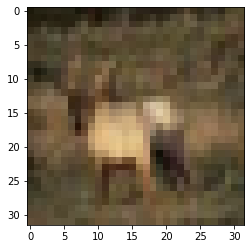

In [24]:
plt.imshow(img[:, :, :3])

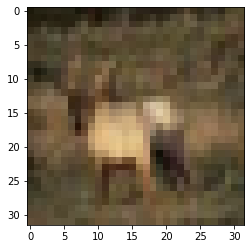

In [25]:
plt.imshow(img)

In [31]:
from loaders import load_model
from models import CifarModel

In [36]:
model = load_model(CifarModel, 'cifar_model')

In [37]:
model.predict(img[:, :, :3])

ValueError: in user code:

    C:\Users\mhannani\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\mhannani\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\mhannani\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\mhannani\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\mhannani\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\mhannani\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\mhannani\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\mhannani\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\mhannani\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\input_spec.py:271 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model_1: expected shape=(None, 32, 32, 3), found shape=(1, 32, 3)


In [34]:
img.shape

(32, 32, 4)

In [39]:
import numpy as np
img = np.expand_dims(img, axis=0)

In [42]:
img[:, :, :, :3].shape

(1, 32, 32, 3)

In [43]:
model.predict(img[:, :, :, :3])

array([[4.4728618e-04, 6.1144056e-05, 7.8536700e-03, 4.6225255e-03,
        9.0898883e-01, 2.5763880e-03, 7.0440628e-02, 4.9740355e-03,
        5.4948368e-06, 2.9919003e-05]], dtype=float32)

In [121]:
from loaders import load_cifar_10

In [122]:
(x_train, y_train), (x_test, y_test) = load_cifar_10()

In [123]:
x_train[0].shape

(32, 32, 3)

In [124]:
classes = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
classes[np.argmax(y_train[8])]

'ship'

In [125]:
img = x_train[8]

In [126]:
def normalize_img(img):
    """
    Normalize the given images.
    :param img: array_like
    :return: array_like
        Normalized image.
    """
    img = np.array(img)
    return img.astype('float32') / 255.0

In [127]:
img_1 = normalize_img(img)

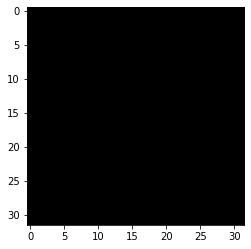

In [128]:
plt.imshow(img_1)

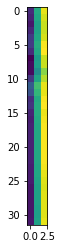

In [129]:
plt.imshow(img[0])

In [120]:
img = np.expand_dims(img, axis=0)

In [90]:
img.shape

(1, 32, 32, 3)

In [102]:
preds = model.predict(img)
preds

array([[6.0439808e-03, 2.3386530e-05, 1.2793447e-04, 7.8848814e-07,
        1.4567861e-06, 3.0182645e-07, 3.6495132e-07, 9.7629718e-09,
        9.9379635e-01, 5.3968906e-06]], dtype=float32)

In [92]:
classes[np.argmax(preds)]

'ship'

In [180]:
import os

In [181]:
model = load_model(CifarModel, 'cifar_model')

In [182]:
def load_and_preprocess(image):
    img = plt.imread(os.path.join(image_directory, image))
    return img

In [183]:
def normalize_img(img):
    """
    Normalize the given images.
    :param img: array_like
    :return: array_like
        Normalized image.
    """
    img = np.array(img)
    return img.astype('float32') / 255.0

In [184]:
def prediction(img):
    if img is None:
        raise dash.exceptions.PreventUpdate
    else:
        img = load_and_preprocess(img)
        scaled_img = normalize_img(img)
        img = np.expand_dims(scaled_img, axis=0)
        classes = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer',
                            'dog', 'frog', 'horse', 'ship', 'truck'])
        y_preds = model.predict(img[:, :, :, :3])
#         print(img)
        print(img.shape)
        print('y_preds')
        print(y_preds)
        predicted_classes = classes[np.argmax(y_preds)]
        print('predicted class')
        print(predicted_classes)

    return scaled_img

In [206]:
image_directory = 'assets/images/'
img = prediction("['ship']_8.png")

(1, 32, 32, 4)
y_preds
[[0.08931606 0.00225801 0.25264513 0.29543093 0.08496448 0.00743027
  0.11011414 0.01048603 0.14687595 0.00047903]]
predicted class
cat


In [207]:
img[:, :, :3].shape
img_sq = np.squeeze(img)

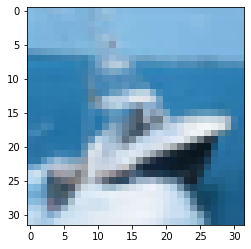

In [208]:
plt.imshow(img[:, :, :3] * 255)

In [209]:
img.shape

(32, 32, 4)

In [210]:
img = np.expand_dims(img, axis=0)
model.predict(img[: , :, :, :3])

array([[0.08931606, 0.00225801, 0.25264513, 0.29543093, 0.08496448,
        0.00743027, 0.11011414, 0.01048603, 0.14687595, 0.00047903]],
      dtype=float32)

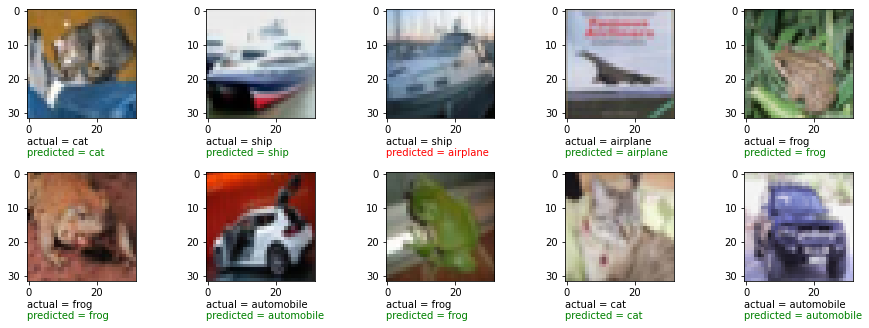

In [214]:
model.plot_predictions(x_test, y_test)

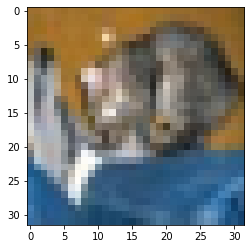

In [218]:
plt.imshow(x_test[0])

In [217]:
img[:, :, :, :3]

array([[[[0.00206075, 0.00286044, 0.00342945],
         [0.00201461, 0.00282968, 0.00338331],
         [0.00196847, 0.00279892, 0.00335256],
         ...,
         [0.00195309, 0.00278354, 0.00341407],
         [0.00195309, 0.00278354, 0.00341407],
         [0.00196847, 0.00279892, 0.00342945]],

        [[0.00204537, 0.00290657, 0.00350634],
         [0.00198385, 0.00286044, 0.00344483],
         [0.00196847, 0.00286044, 0.00344483],
         ...,
         [0.00195309, 0.0028143 , 0.00344483],
         [0.00195309, 0.0028143 , 0.00344483],
         [0.00196847, 0.00282968, 0.00346021]],

        [[0.00196847, 0.00284506, 0.00347559],
         [0.00195309, 0.00279892, 0.00342945],
         [0.00196847, 0.00279892, 0.00342945],
         ...,
         [0.00193772, 0.00278354, 0.00341407],
         [0.00193772, 0.00278354, 0.00341407],
         [0.00193772, 0.00276817, 0.00339869]],

        ...,

        [[0.00267589, 0.00319877, 0.00361399],
         [0.00262976, 0.00316801, 0.00352172]

In [235]:
img = plt.imread('assets/images/generated_frog_4.png')

In [236]:
img.shape

(32, 32, 4)

In [237]:
img_rgb = img[:, :, :3]

In [238]:
img_rgb.shape

(32, 32, 3)

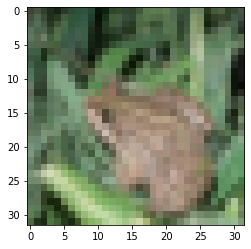

In [239]:
plt.imshow(img_rgb)

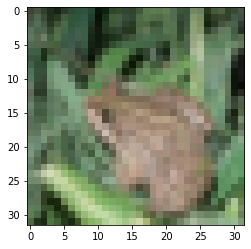

In [241]:
plt.imshow(img)

In [242]:
img

array([[[0.25490198, 0.26666668, 0.19607843, 1.        ],
        [0.27450982, 0.31764707, 0.2509804 , 1.        ],
        [0.1882353 , 0.2509804 , 0.18039216, 1.        ],
        ...,
        [0.2       , 0.2627451 , 0.16078432, 1.        ],
        [0.21176471, 0.29803923, 0.20784314, 1.        ],
        [0.2627451 , 0.34117648, 0.25882354, 1.        ]],

       [[0.27058825, 0.3137255 , 0.22745098, 1.        ],
        [0.30980393, 0.4       , 0.31764707, 1.        ],
        [0.23529412, 0.2901961 , 0.22352941, 1.        ],
        ...,
        [0.21176471, 0.25882354, 0.17254902, 1.        ],
        [0.25490198, 0.3529412 , 0.27058825, 1.        ],
        [0.23921569, 0.31764707, 0.25882354, 1.        ]],

       [[0.28627452, 0.37254903, 0.28235295, 1.        ],
        [0.32941177, 0.42745098, 0.34117648, 1.        ],
        [0.28235295, 0.34509805, 0.27450982, 1.        ],
        ...,
        [0.30588236, 0.38431373, 0.29411766, 1.        ],
        [0.28627452, 0.384313